<a href="https://colab.research.google.com/github/Leon-S-Sekiya/h.lab/blob/main/deepzero3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワーク

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/My Drive/Colaboratory/')

In [3]:
!ls- la

/bin/bash: ls-: command not found


deepzero2.ipynbでは、パーセプトロンについて学んだが、パーセプトロンについては良いニュースと悪いニュースがあった。

良いニュースとは、パーセプトロンは複雑な関数であっても、それを表現できるだけの可能性を秘めているということである。

例えば、コンピュータが行うような複雑そうな処理であっても、パーセプトロンは(理論上)表現できる。

悪いニュースは、重みを設定する作業--------期待する入力と出力を満たすように適切な重みを決める作業-------は、今のところ人の手によって行われている、ということである。

deepzero2.ipynbでは、ANDやORゲートの真理値表を見ながら、我々人間が適切な重みを決めた。

ニューラルネットワークは、先の悪いニュースを解決するためにある。

具体的に言うと、適切な重みパラメータをデータから自動で学習できる、というのがニューラルネットワークの重要な性質のひとつである。

本ノートでは、ニューラルネットワークの概要を説明し、ニューラルネットワークが識別を行う際の処理に焦点を当てる。

そして、deepzero4.ipynbでデータから重みパラメータを学習する方法を学ぶ。

# 1 パーセプトロンからニューラルネットワークへ

ニューラルネットワークは、deepzero2.ipynbで説明したパーセプトロンと共通する点が多くある。

ここでは、deepzero2.ipynbのパーセプトロンと異なる点を中心に、ニューラルネットワークの仕組みを解説していく。

**1.1 ニューラルネットワークの例**

ニューラルネットワークを図で示すと、以下のようになる。

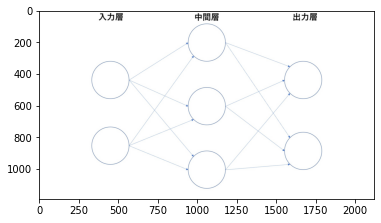

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('31.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

このネットワークは全部で3層から構成されるが、重みを持つ層は実質2層であるため、「2層ネットワーク」と呼ぶことにする。

書籍によっては、ネットワークを構成する層の数に従って、この図を「3層ネットワーク」と呼ぶ場合があるので、誤解のないように注意しておく。

図を見る限り、deepzero2.ipynbで見たパーセプトロンと同じような形をしている。

実際、ニューロンのつながり方に関して言えば、deepzero2.ipynbで見たパーセプトロンと何ら変わりない。

それでは、ニューラルネットワークではどのように信号を伝達するのだろうか？

**1.2 パーセプトロンの復習**

これからニューラルネットワークにおける信号の伝達方法を見ていくが、それに先立ち、ここではパーセプトロンの復習を挟んでおく。

それでは初めに、下図の構造のネットワークを見てみよう。

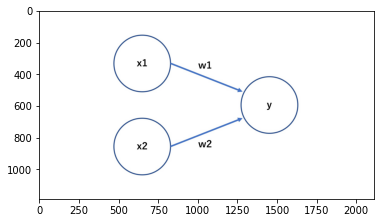

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('32.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

この図は、$x_1$と$x_2$の2つの入力信号を受け取り、$y$を出力するパーセプトロンである。

図のパーセプトロンを数式で表すと、次の式で表されるのだった。

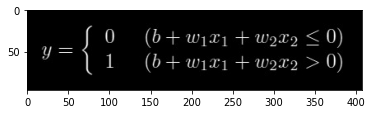

In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('shiki2.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

ここで$b$は「バイアス」と呼ばれるパラメータで、これはニューロンの発火のしやすさをコントロールする。

一方、$w_1$や$w_2$は各信号の「重み」を表すパラメータで、これらは各信号の「重み」を表すパラメータで、これらは各信号の重要性をコントロールする。

ところで、先の図のネットワークではバイアス$b$が明示されていない。

もしバイアスを明示するならば、下図のように表すことができる。

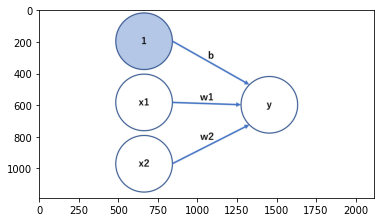

In [7]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('33.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

この図では、重みが$b$で入力が$1$の信号が追加されている。

このパーセプトロンの動作は、$x_1$と$x_2$と$1$の$3$つの信号がニューロンの入力となり、それら$3$つの信号にそれぞれの乗算され、次のニューロンに送信される。

次のニューロンでは、それらの重み付けされた信号の和が計算され、その和が$0$を超えたら$1$を出力し、そうでなければ$0$を出力する。

ちなみに、バイアスの入力信号は常に$1$であるため、図で表す際には、ニューロンを色で塗りつぶし、他のニューロンと差別化することにする。

それでは、先の数式をよりシンプルな形に書き換えたいと思う。

式を簡略化するには、場合分けの動作-----$0$を超えたら$1$を出力し、そうでなければ$0$を出力するという動作-----をひとつの関数で表す。

ここでは、$h(x)$という関数を導入し、次の式で書き換える。

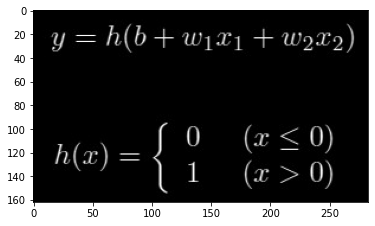

In [8]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('shiki4.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

$y=$の式は、入力信号の総和が$h(x)$という関数によって変換され、その変換された値が出力$y$になるということを表している。

そして、$h(x)$の関数は、入力が$0$を超えたら$1$を返し、そうでなければ$0$を返す。

**1.3 活性化関数の登場**

さて、ここで登場した$h(x)$という関数だが、このような関数-----入力信号の総和を出力に変換する関数-----は、一般に**活性化関数**(activation function)と呼ばれる。

「活性化」という名前が意味するように、活性化関数は入力信号の総和がどのように活性化するか(どのように発火するか)ということを決定する役割がある。

それではさらに、$y=$の式を書き換えていく。

$y=$の式では、重み付きの入力信号の総和を計算し、そして、その和が活性化関数によって変換される、という$2$段階の処理を行っている。

そのため、$y=$の式を丁寧に書くとすれば、次の$2$つの式に分けて書くことができる。

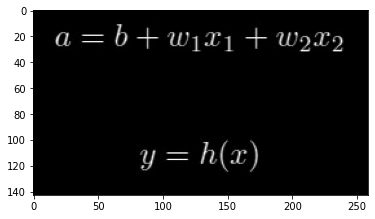

In [9]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('shiki5.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

$a=$の式では、重み付き入力信号とバイアスの総和を計算し、それを$a$とする。

そして、次の式において、$a$が$h()$で変換され$y$が出力される、という流れになる。

さて、これまでニューロンはひとつの〇で図示してきたが、上式を明示的に示すとすれば、下図のように表すことができる。

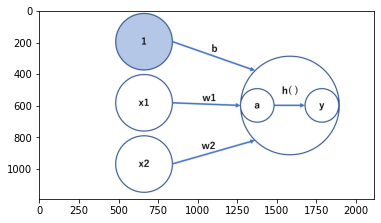

In [10]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('34.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

図で示されるように、これまでニューロンの〇の中に、活性化関数によるプロセスを明示的に図示している。

つまり、重み付き信号の和の結果が$a$というノードになり、そして、活性化関数$h()$によって$y$というノードに変換される、ということがはっきりと示されている。

なお、本ノートでは、「ニューロン」と「ノード」という用語を同じ意味で用いる。

ここで、$a$と$y$の〇を「ノード」と呼んでいるが、これは、これまでの「ニューロン」と同じ意味で用いている。

それでは、続いて活性化関数について詳しく見ていくことにする。

この活性化関数が、パーセプトロンからニューラルネットワークへ進むための架け橋となる。

「パーセプトロン」という言葉が指すアルゴリズムは、deepzero.ipynbシリーズでは厳密な統一が成されていない。

一般的に、「単純パーセプトロン」といえば、それは単層のネットワークで、活性化関数にステップ関数(閾値を境にして出力が切り替わる関数)を使用したモデルを指す。

「多層パーセプトロン」というと、それはニューラルネットワーク-----多層で、シグモイド関数などの滑らかな活性化関数を使用するネットワーク-----を指すのが一般的である。

# 2 活性化関数

活性化関数は、閾値を境にして出力が切り替わる関数で、それは「ステップ関数」や「階段関数」と呼ばれる。

そのため、「パーセプトロンでは、活性化関数にステップ関数を利用している」と言うことができる。

つまり、活性化関数の候補としてたくさんある関数の中で、パーセプトロンは「ステップ関数」を採用している。

パーセプトロンでは活性化関数にステップ関数を用いているならば、活性化関数にステップ関数以外を使ったらどうなるのだろうか？

実は、活性化関数をステップ関数から別の関数に変えることで、ニューラルネットワークの世界へと進むことができるのだ！

それでは早速、ニューラルネットワークで利用される活性化関数を紹介しよう。

**2.1 シグモイド関数**

ニューラルネットワークでよく用いられる活性化関数のひとつは、以下の式で表される**シグモイド関数**(sigmoid function)である。

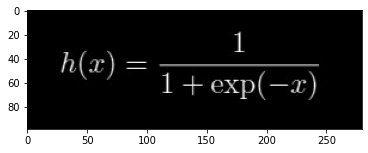

In [11]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('3.6.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

ここで、$e$はネイピア数の$2.7182...$の実数を表す。

この式で表されるシグモイド関数は一見難しそうだが、シグモイド関数も単なる「関数」である-----関数は、何か入力を与えれば、何らかの出力が返される変換器である。

例えば、シグモイド関数に$1.0$や$2.0$を入力すると、$h(1.0)=0.731...$、$h(2.0)=0.880...$のように、ある値が出力される。

ニューラルネットワークでは活性化関数にシグモイド関数を用いて信号の変換を行い、その変換された信号が次のニューロンに伝えられる。

実は、パーセプトロンとニューラルネットワークの主な違いは、この活性化関数だけなのである。

その他の点は、パーセプトロンと同じである。

それでは、活性化関数として利用されるシグモイド関数について、ステップ関数と比較しながら詳しく見ていくことにする。

**2.2 ステップ関数の実装**

ここではPythonを使ってステップ関数をグラフで表す(関数の形を視覚的に確認することは、関数を理解する上で重要である)。

ステップ関数は、入力が0を超えたら1を出力し、それ以外は0を出力する関数であった。

ステップ関数を単純に実装するとすれば、次のようになる。

In [12]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

この実装は単純で分かりやすいが、引数の$x$は実数(浮動小数点数)しか入力できない。

つまり、**step_function(3.0)**といった使い方はできるが、NumPyの配列を引数に取るような使い方-----たとえば、**step_function(np.array([1.0, 2.0]))**のような使い方-----はできないのである。

ここでは今後のことを考え、NumPy配列に対応した実装に修正したいと思う。

そのためには、例えば次のような実装が考えられる。

In [13]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

上の関数の中身はたった2行だが、NumPyの便利な"トリック"を使っているため、少し分かりにくいかもしれない。

ここでは、どのようなトリックを使っているのか、次のPythonインタプリタの例を見ながら説明する。

次の例では、$x$というNumPy配列を用意し、そのNumPy配列に対して不等号による演算を行う。

In [14]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [15]:
y = x > 0
y

array([False,  True,  True])

NumPy配列に対して不等号の演算を行うと、配列の各要素に対して不等号の演算が行われ、ブーリアンの配列が生成される。

ここでは、$x$という配列の要素に対し0より大きい要素は**True**に、0以下の要素は**False**に変換され、新しい配列**y**が生成される。

さて、先の**y**という配列はブーリアンの配列であったが、我々の望むステップ関数は、0か1の「**int**型」を出力する関数である。

そのため、配列**y**の要素の型をブーリアンから**int**型に変換する。

In [16]:
y = y.astype(np.int)
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([0, 1, 1])

ここで示したように、NumPy配列の型の変換には**astype()**メソッドを用いる。

**astype()**メソッドでは、引数に希望する型-----この例では、**np.int**-----を指定する。

なお、Pythonではブーリアン型から**int**型に変換すると、**True**が1に、**False**が0に変換される。

以上が、ステップ関数の実装で使われるNumPyの"トリック"である。

**2.3 ステップ関数のグラフ**

それでは、上で定義したステップ関数をグラフで表してみよう。

そのために、ライブラリとして**matplotlib**を使用する。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


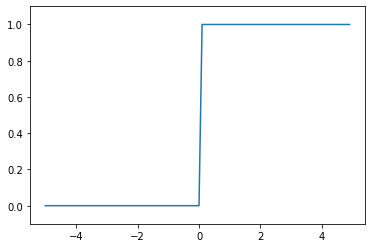

In [17]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

**np.arange(-5.0, 5.0, 0.1)**は、-5.0から5.0までの範囲を0.1刻みでNumPy配列を生成する(**[-5.0, -4.9, ..., 4.9]**を生成する)。

**step_function()**は、NumPy配列を引数に取り、配列の各要素に対してステップ関数を実行し、結果を配列として返す。

図で表せるように、ステップ関数は0を境にして、出力が0から1(または1から0)へ切り替わる。

なお、図のように階段状に値が切り替わる形から、ステップ関数は「階段関数」と呼ばれることもある。

**2.4 シグモイド関数の実装**

続いてシグモイド関数を実装する。

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

ここで**np.exp(-x)**は数式のexp(-x)に対応する。

この実装は特に難しいことはないが、引数の**x**にNumPy配列を入力しても、結果は正しく計算されることに注意せよ。

実際、この**sigmoid**関数にNumPy配列を入力すると、次のように正しく計算される。

In [19]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

シグモイド関数の実装がNumPy配列に対応していることは、NumPyのブロードキャストに秘密がある。

ブロードキャストの機能により、スカラ値とNumPy配列での演算が行われると、スカラ値とNumPy配列の各要素どうしで演算が行われる。

ここでもひとつ具体例を示す。

In [20]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [21]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

上の例では、スカラ値(例では**1.0**)とNumPy配列の間で数値演算(+や/など)が行われている。

結果として、スカラ値とNumPy配列の各要素の間で演算が行われ、演算の結果がNumPy配列として出力されている。

先のシグモイド関数の実装でも、**np.exp(-x)**はNumPy配列を生成するため、**1 / (1 + np.exp(-x))**の結果は、NumPy配列の各要素の間で計算されることになる。

それでは、シグモイド関数をグラフに描画する。

描画のためのコードは、先のステップ関数のコードとほとんど同じである。

唯一異なる箇所は、**y**を出力する関数を**sigmoid**関数に変更する点である。

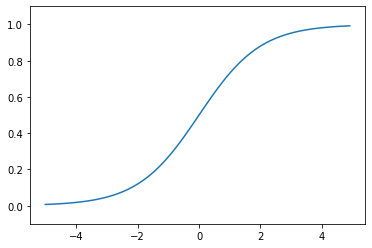

In [22]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

**2.5 シグモイド関数とステップ関数の比較**

シグモイド関数とステップ関数を見比べてみよう。

ステップ関数とシグモイド関数を下図に示す。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


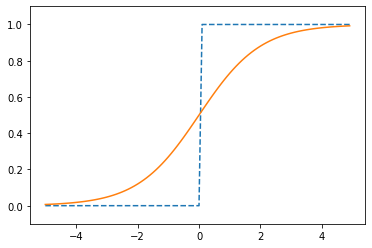

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, ls='--')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

2つの関数の異なっている点はどこだろうか。

また、どのような点が共通する性質といえるだろうか。

まず気づく点は、「滑らかさ」の違いである。

シグモイド関数は滑らかな関数であり、入力に対して連続的に出力が変化する。

一方、ステップ関数は0を境に急に出力を変えている。

このシグモイド関数の滑らかさが、ニューラルネットワークの学習において重要な意味をもつ。

また、ステップ関数が0か1のどちらかの値しか返さないのに対して、シグモイド関数は実数-----0.731...や0.880...など------を返すという点も異なる。

つまり、パーセプトロンではニューロン間を0か1の二値の信号が流れていたのに対して、ニューラルネットワークでは連続的な実数値の信号が流れる。

ところで、このような2つの関数の動作を"水"に関連づけて語るとすれば、ステップ関数は「ししおどし」に、シグモイド関数は「水車」にたとえられるだろう。

-----ステップ関数が「ししおどし」のように、水を次へ流すか流さないか(0か1か)の2つの動きをするのに対して、シグモイド関数は「水車」のように流れてきた水の量に比例して、次へ流す水の量を調整する。

続いて、ステップ関数とシグモイド関数の共通する性質についてである。

ステップ関数とシグモイド関数では、"滑らかさ"という点では異なるが、大きな視点で見れば同じような形をしていることが分かる。

実際、両者とも入力が小さいときに出力は0に近く、入力が大きくなるに従い出力が1に近づくという構造をしている。

つまり、ステップ関数とシグモイド関数は、入力信号が重要な情報であれば大きな値を出力し、入力信号が重要でなければ小さな値を出力する。

そして、どんなに入力信号の値が小さくても、またどんなに入力信号の値が大きくても、出力信号の値を0から1の間に押し込めるのも両者の共通点である。

**2.6 非線形関数**

ステップ関数とシグモイド関数の共通点は他にもある。

重要な共通点は、両者はともに**非線形関数**であるということである。

シグモイド関数は曲線、ステップ関数は階段のような折れ曲がった直線で表され、ともに非線形な関数に分類される。

活性化関数の説明では、「非線形関数」「線形関数」という用語がよく登場する。

そもそも関数は、何かの値を入力すれば何かの値を返す「変換器」である。

この変換器に何か入力したとき、出力が入力の定数倍になるような関数を線形関数という(数式で表すと**h(x)=cx**、 cは定数)。

そのため、線形関数はまっすぐな1本の直線になる。

一方、非線形関数は、読んで字の如く、線形関数のように単純な1本の直線ではない関数を指す。

ニューラルネットワークでは、活性化関数に非線形関数を用いる必要がある。

これは言い換えると、活性化関数には線形関数を用いてはならない、ということである。

なぜ線形関数を用いてはならないのだろうか。

それは、線形関数を用いると、ニューラルネットワークで層を深くすることの意味がなくなってしまうからである。

線形関数の問題点は、どんなに層を深くしても、それと同じことを行う「隠れ層のないネットワーク」が必ず存在する、という事実に起因する。

このことを具体的に理解するために、次の簡単な例を考えてみる。

ここでは、線形関数である$h(x)=cx$を活性化関数として、$y(x)=h(h(h(x)))$を行う計算を3層のネットワークに対応させて考えることにする。

この計算は、$y(x)=c\times c \times c \times x$の掛け算を行うが、同じことは$y(x)=ax$(ただし$a=c^3$)の1回の掛け算で、つまり、隠れ層のないネットワークで表現できる。


この例のように、線形関数を用いた場合、多層にすることの利点を生かすことができない。

そのため、層を重ねることの恩恵を得るためには、活性化関数に非線形関数を使う必要がある。

**2.7 ReLU関数**

これまでに、活性化関数としてステップ関数とシグモイド関数を紹介した。

シグモイド関数は、ニューラルネットワークの歴史において、古くから利用されてきたが、最近は**ReLU**(Rectified Linear Unit)という関数が主に使われる。

ReLUは、入力が0を超えていれば、その入力をそのまま出力し、0以下ならば0を出力する関数である。

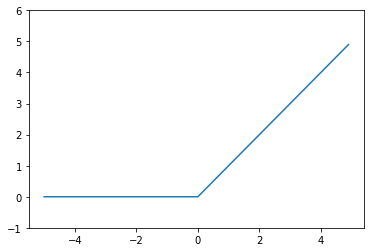

In [24]:
def relu(x):
    return np.maximum(0, x)
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 6) # y軸の範囲を指定
plt.show()

ReLu関数を数式で表すと、次のように書くことができる。

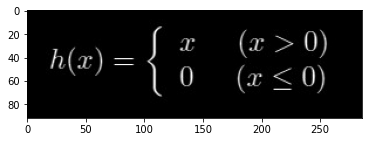

In [25]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('shiki6.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

グラフや数式の通り、ReLU関数はとてもシンプルな関数である。

そのため、ReLU関数の実装も簡単である。

In [26]:
def relu(x):
    return np.maximum(0, x)

ここでは、NumPyの**maximum**という関数を使っている。

この**maximum**は、入力された値から大きいほうの値を選んで出力する関数である。

# 3 多次元配列の計算

NumPyの多次元配列を使った計算をマスターすれば、ニューラルネットワークの実装を効率的に進めることができる。

そのため、ここではNumPyによる多次元配列の計算について説明し、その後にニューラルネットワークの実装を行っていく。

**3.1 多次元配列**

多次元配列とは、簡単に言うと、「数字の集合」である。

数字が1列に並んだものや長方形状に並べたもの、3次元状に並べたものやN次元状に並べたものを多次元配列という。

それでは、NumPyを使って、多次元配列を作成しよう。

まず、これまで見てきた1次元の配列からである。

In [27]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [28]:
np.ndim(A)

1

In [29]:
A.shape

(4,)

In [30]:
A.shape[0]

4

ここで示すように、配列の次元数は**np.ndim()**関数で取得できる。

また、配列の形状はインスタンス変数の**shape**から取得できる。

上の例では、**A**は1次元の配列であり、4つの要素から構成されていることが分かる。

なお、ここでは**A.shape**の結果がタプルになっていることに注意。

これは、1次元配列の場合であっても、多次元配列の場合と同じ統一された結果を返すからである。

例えば、2次元配列のときは**(4, 3)**、3次元配列のときは**(4, 3, 2)**といったタプルが返されるため、次元数が1の1次元配列のときも同様にタプルとして結果が返される。

それでは続いて、2次元の配列を作成する。

In [31]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [32]:
np.ndim(B)

2

In [33]:
B.shape

(3, 2)

ここでは「3$\times$2の配列」である**B**を作成している。

3$\times$2の配列とは、最初の次元に3つの要素があり、次の次元に2つの要素があるという意味である。

なお、最初の次元は0番目の次元、次の次元は1番目の次元に対応する。

また、2次元配列は**行列**(matrix)と呼ぶ。

配列の横方向を**行**(row)、縦方向を**列**(column)と呼ぶ。

**3.2 行列の積**

続いて、行列(2次元配列)の積について説明する。

行列の積は、例えば2$\times$2の行列の場合、以下のように計算する。

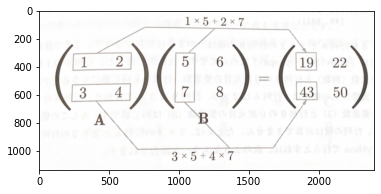

In [34]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('gyoretu.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

この例で示すように、行列の積は、左側の行列の行(横方向)と右側の行列の列(縦方向)の間の要素ごとの積とその和によって計算が行われる。

そして、その計算の結果は新しい多次元配列の要素として格納される。

たとえば、**A**の1行目と**B**の1行目の結果は1行1列目の要素、**A**の2行目と**B**の1行目は2行1列目の要素、といったようになる。

この計算をPythonで実装すると次のようになる。

In [35]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [36]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [37]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

ここで、AとBは2$\times$2の行列であり、**A**と**B**の行列の積をNumPyの関数**np.dot()**で計算する。

**np.dot()**は、1次元配列の場合はベクトルを、2次元配列では行列の積を計算する。

ここで注意が必要なのは、**np.dot(A, B)**と**np.dot(B, A)**は異なる値になりえるということがある。

通常の演算(+や＊など)と違って、行列の積では、被演算子**(A, B)**の順番が異なると、結果も異なる。

さて、ここでは2×2の形状の行列について、その積を求める例を示したが、別の形状の行列の積についても、同様に計算することができる。

たとえば、2×3の行列と3×2の行列の積をPythonで実装すると次のようになる。

In [38]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [39]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [40]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

2×3の行列**A**と3×2の行列**B**の積は↑のように実装できる。

ここで注意すべきは、「行列の形状(**shape**)」についてである。

具体的に言うと、行列**A**の1次元目の要素数(列数)と行列**B**の0次元目の要素数(行数)を同じ値にする必要がある。

実際に↑の例では、行列**A**は2×3、行列**B**は3×2であり、行列**A**の1次元目の要素数(3)と行列**B**の0次元目の要素数(3)は同じ値である。

もしこの値が異なれば、行列の値は計算できない。

例えば、2×3の行列**A**と2×2の行列**C**の積をPythonで行うと、次のようなエラーが出力される。

In [41]:
C = np.array([[1,2], [3,4]])
C.shape

(2, 2)

In [42]:
A.shape

(2, 3)

In [43]:
#np.dot(A, C)

このエラーが述べることは、行列**A**の1次元目と行列**C**の0次元目の次元の要素数が一致していない、ということである。

つまり、多次元配列の積では、2つの行列で対応する次元の要素数を一致させる必要がある。

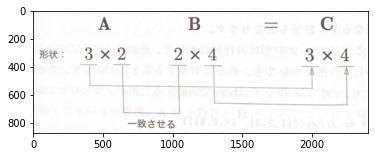

In [44]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('yousosu.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

なお、**A**が2次元の行列で、**B**が1次元の配列の場合でも、「対応する次元の要素数を一致させる」という同じ原則が成り立つ。

In [45]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape

(3, 2)

In [46]:
B = np.array([7,8])
B.shape

(2,)

In [47]:
np.dot(A, B)

array([23, 53, 83])

**3.3 ニューラルネットワークの行列の積**

それでは、NumPy行列を使ってニューラルネットワークの実装を行う。

ここでは、以下の簡単なニューラルネットワークを対象とする。

このニューラルネットワークは、バイアスと活性化関数は省略し、重みだけがあるものとする。

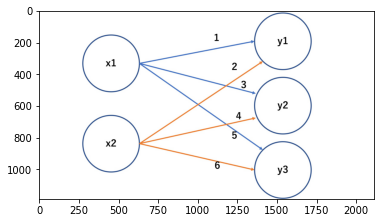

In [48]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('314.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

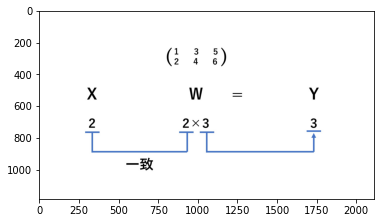

In [49]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('3142.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

実装に関しては、**X**、**W**、**Y**の形状に注意しよう。

特に、**X**と**W**の対応する次元の要素数が一致していることが重要な点である。

In [50]:
X = np.array([1, 2])
X.shape

(2,)

In [51]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [52]:
W.shape

(2, 3)

In [53]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


ここで示したように、**np.dot()**を使えば、**Y**の結果を一度に計算することができる。

これが意味することは、もし**Y**の要素数が100や1000であったとしても、一度の演算で計算できるということである。

もし、**np.dot()**を使わなければ、**Y**の要素をひとつずつ取り出して計算しなければならないので、とても面倒である。

そのため、行列の積によって一度で計算ができるというテクニックは、実装上とても重要である。

# 4 3層ニューラルネットワークの実装

それでは、"実践的"なニューラルネットワークの実装を行う。

ここでは、下図に示す3層ニューラルネットワークを対象として、その入力から出力への処理(フォワード方向への処理)を実装する。

実装に関しては、NumPyの多次元配列を使う。

NumPy配列をうまく使うことで、ほんの少しのコードでニューラルネットワークフォワード処理を完成させることができる。

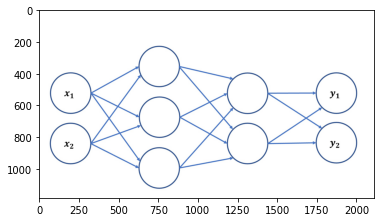

In [54]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('nyu315.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

**4.1 記号の確認**

ここではニューラルネットワークで行う処理を説明するにあたって、$w^{(1)}_{12}$や$a^{(1)}_1$などの記号を導入する。


それでは初めに記号の定義から始める。

次の図を見てほしい。

図は、入力層の$x_2$のニューロンから、次層のニューロン$a^{(1)}_1$への重みだけをピックアップして図示している。

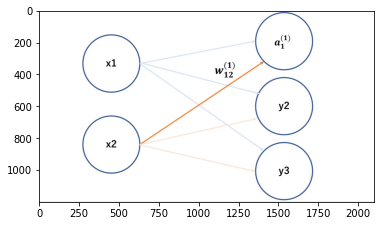

In [55]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('316a.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

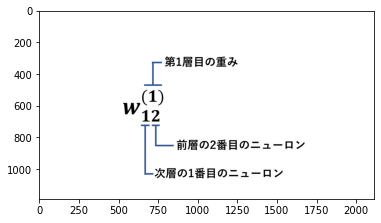

In [56]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('316b.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

図に示す通り、重みや隠れ層のニューロンの右上には「$(1)$」とある。

これは、第１層の重み、第１層のニューロン、ということを意味する番号である。

また、重みの右下には２つ数字が並ぶが、これは、次層のニューロンと前層のニューロンのインデックス番号から構成される。

例えば、$w^{(1)}_{12}$は前層の２番目のニューロン$(x_2)$から次層の１番目のニューロン$(a^{(1)}_1)$への重みであることを意味する。

重みの右下のインデックス番号は「次層の番号、前層の番号」の順に並ぶことにする。

**4.2 各層における信号伝達の実装**

それでは、入力層から「第１層目の1番目のニューロン」への信号の伝達を見ていこう。

図で表すと、下図のようになる。

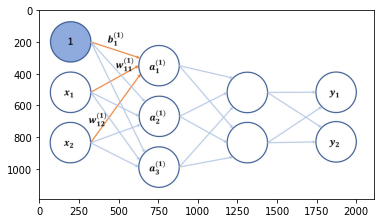

In [57]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('316.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

図に示す通り、バイアスのためのニューロンである①が追加されている。

ここでは、バイアスの右下のインデックスがひとつしかないことに注意せよ。

これは、前層のバイアスニューロン(①ニューロン)がひとつだけしか存在しないためである。

それではこれまでの確認も含めて、$a^{(1)}_1$を数式で表してみよう。

$a^{(1)}_1$は重み付き信号とバイアスの和で次のように計算される。

> $a^{(1)}_1=w^{(1)}_{11}x_1+w^{(1)}_{12}x_2+b^{(1)}_1$





また、行列の積を用いると、第１層目の「重み付き和」は次の式でまとめて表すことができる。

**$A^{(1)}$**=**$XW^{(1)} + B^{(1)}$**

ただし

**$A^{(1)}$**=$(a^{(1)}_1,a^{(1)}_2,a^{(1)}_3)$

**X**=($x_1,x_2$)

**$B^{(1)}$**=($b^{(1)}_1,b^{(1)}_2,b^{(1)}_3$)

**$W^{(1)}$**=

それでは、Numpyの多次元配列を使って、実装していく。

（ここでは、入力信号、重み、バイアスは適当な値に設定している。）

In [58]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape)  # (2,)
print(B1.shape) # (3,)

(2, 3)
(2,)
(3,)


In [59]:
A1 = np.dot(X, W1) + B1

この計算は、前行ったヤツである。

**W1**は$2\times 3$の配列、**X**は要素数が2の1次元配列である。

ここでもやはり、**W1**と**X**の対応する次元の要素数が一致している。

続いて、第1層目の活性化関数によるプロセスを見ていく。

この活性化関数によるプロセスを図で表すと、下図のようになる。

下図に示す通り、隠れ層での重み付き和(重み付き信号とバイアスの総和)を$a$で表し、活性化関数で変換された信号を$z$で表すことにする。

また、図では活性化関数を$h()$で表し、ここではシグモイド関数を使うことにする。

これをPythonで実装すると、次のようになる。

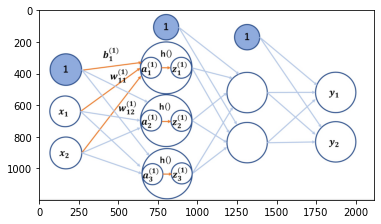

In [60]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('318.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

In [61]:
Z1 = sigmoid(A1)

print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


この**sigmoid()**関数は、前に定義した関数である。

この関数は、Numpy配列を受け取り、同じ要素数からなるNumpy配列を返す。

それでは続いて、第1層から第2層までの実装を行う。

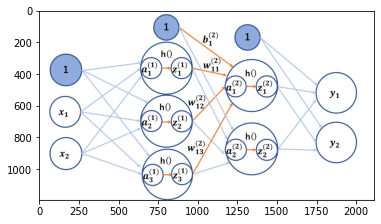

In [62]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('319.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

In [63]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

(3,)
(3, 2)
(2,)


In [64]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

この実装は、第1層の出力**(Z1)**が第2層への入力になっている点を除けば、先ほどの実装とまったく同じである。

NumPy配列を使うことで、層から層への信号の伝達が簡単に書けることが分かる。

最後に、第2層目から出力層への信号の伝達である。

出力層の実装も、これまでの実装とほとんど同じである。

ただし、最後の活性化関数だけが、これまでの隠れ層とは異なる。

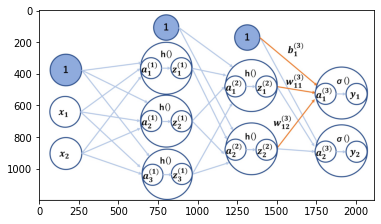

In [65]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('320.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

In [66]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # もしくはY = A3

ここでは、**identity_function()**という関数を定義して、この関数-----これを「恒等関数」という------を出力層の活性化関数として利用する。

恒等関数は、入力をそのまま出力する関数である。

そのため、この例では、わざわざ**identity_function()**を定義する必要はないのだが、これまでの流れと統一するために、このような実装にしている。

なお、上の表記では、出力層の活性化関数は$\sigma()$で表し、隠れ層の活性化関数$h()$とは異なることを示している。

出力層で利用する活性化関数は、解く問題の性質に応じて決める。

例えば、回帰問題では恒等関数、2クラス分類問題ではシグモイド関数、多クラス分類ではソフトマックス関数を使うのが一般的である。

出力層の活性化関数については、次節で詳しく見ていく。

**4.3 実装のまとめ**

これで3層ニューラルネットワークの説明は終わりである。

それでは、ここまで行ってきた実装をまとめて書いてみることにする。

なお、ここではニューラルネットワークの実装の慣例として、重みだけを**W1**といったように大文字で表記し、それ以外(バイアスや中間結果など)は小文字で表記する。

In [67]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


ここでは、**init_function()、forward()**という関数を定義している。

**init_function()**関数で、重みとバイアスの初期化を行い、それらをディクショナリ型の変数**network**に格納する。

このディクショナリ型の変数**network**には、それぞれの層で必要なパラメータ＿＿＿重みと関数＿＿＿＿が格納されている。

そして、**forward()**関数では、入力信号が出力へと変換されるプロセスがまとめて実装されている。

なお、ここでforwardという単語が出てきたが、これは入力から出力方向への伝達処理を表している。

後ほど、ニューラルネットワークの学習を行う際に、バックワード方向＿＿＿＿出力から入力方向＿＿＿＿の処理について見ていく。

これで、ニューラルネットワークのフォワード方向の実装は終わりである。

NumPyの多次元配列をうまく使うことで、ニューラルネットワークの実装を効率的に行うことができた。

# 5 出力層の設計

ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる。

ただし、分類問題と回帰問題のどちらに用いるかで、出力層の活性化関数を変更する必要がある。

一般的に、回帰問題では恒等関数を、分類問題ではソフトマックス関数を使う。

機械学習の問題は、「分類問題」と「回帰問題」に大別できる。

分類問題とは、データがどのクラスに属するか、という問題である。

例えば、人の写った画像から、その人が男性か女性のどちらであるかを分類するような問題が分類問題に相当する。

一方で、回帰問題は、ある入力データから、(連続的な)数値の予測を行う問題である。

例えば、人の写った画像から、その人の体重を予測するような問題が、回帰問題の例である。

**5.1 恒等関数とソフトマックス関数**

恒等関数は、入力をそのまま出力する。

入ってきたものに対して何も手を加えずに出力する関数＿＿＿＿それが恒等関数である。

そのため、出力層で恒等関数を用いるときは、入力信号をそのまま出力するだけになる。

なお、恒等関数によるプロセスをこれまで見てきたニューラルネットワークの図で表すとすれば、以下のように書くことができる。

恒等関数によって変換されるプロセスは、これまでの隠れ層での活性化関数と同じで、1本の→で描画する。

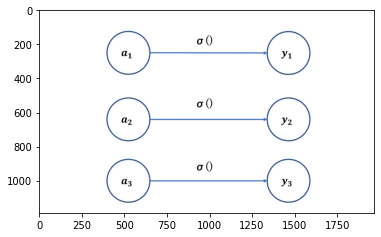

In [68]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('koutou.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

一方、分類問題で使われるソフトマックス関数は、次の式で表される。

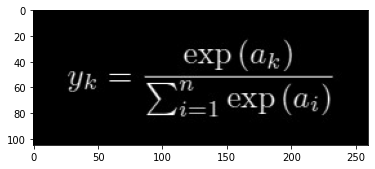

In [69]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('3.10.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

ここでは出力層が全部でn個あるとして、k番目の出力$y_k$を求める計算式を表している。

上式に示すように、ソフトマックス関数の分子は入力信号$a_k$の指数関数、分母はすべての入力信号の指数関数の和から構成される。

なお、ソフトマックス関数を図で表すと、下図のようになる、図に示すように、ソフトマックス関数の出力は、すべての入力信号から矢印による結びつきがある。

数式の分母から分かるように、出力の各ニューロンが、すべての入力信号から影響を受けることになるからである。

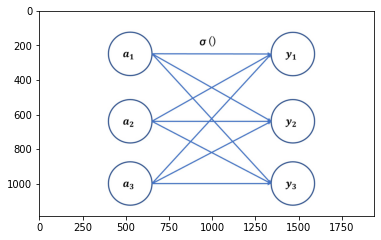

In [70]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('softmax.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

それでは、ソフトマックス関数を実装する。

ここでは、Pythonインタプリタを使い、一つずつ結果を確認しながら進めていく。

In [71]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 指数関数
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [72]:
sum_exp_a = np.sum(exp_a) # 指数関数の和
print(sum_exp_a)

74.1221542101633


In [73]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


この式は、ソフトマックス関数の式をそのままPythonで表現したものである。

そのため、特に解説はしないものとする。

ここでは、後にソフトマックス関数を使うことを考え、Pythonの関数として次のように定義する。

In [74]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

**5.2　ソフトマックス関数の実装上の注意**

上の**softmax**関数の実装は、ソフトマックス関数の数式を正しく表現できているが、コンピュータで計算を行う上では欠陥がある。

その欠陥とは、オーバーフローに関する問題である。

ソフトマックス関数の実装では、指数関数の計算を行うことになるが、その際、指数関数の値が容易に大きな値になり得る。

例えば、$e^{10}$は20,000を超え、$e^{100}$は0が40個以上も並ぶ大きな値となり、$e^{1000}$は無限大を表すinfが返ってくる。

そして、このような大きな値どうしで割り算を行うと、数値が"不安定"な結果になってしまう。

コンピュータで「数」を扱う場合、その数値は4バイトや8バイトといった有限のデータ幅に収められることになる。

これが意味することは、数には有効桁数があるということ、つまり、表現できる数値の範囲に制限があるということである。

そのため、とても大きな値は表現できないという問題が発生する。

これをオーバーフローといい、コンピュータで計算を行う際には注意しなければならない。

ソフトマックス関数の改善案は、次の式から導かれる。

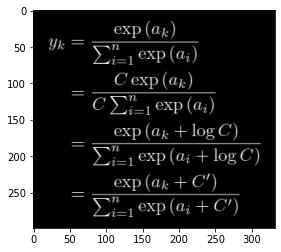

In [75]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('softmaxex.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

最初の変形では、Cという任意の定数を分子と分母に掛けている。(分子と分母の両方に同じ定数を乗算しているため、同じ計算を行っていることになる。)

そして、そのCを指数関数の中に移動させ、$\log$Cとする。

最後に、$\log$CをC'という別の記号に置き換える。

この式で述べていることは、ソフトマックスの指数関数の計算を行う際には、何らかの定数を足し算(もしくは引き算)しても、結果は変わらないということである。

ここでC’にはどのような値を用いることもできるが、オーバーフローの対策としては、入力信号の中で最大の値を用いることが一般的である。

それでは、ひとつ具体例を見てみよう。

In [76]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算
#これは正しく計算されません。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [77]:
c = np.max(a) #1010のこと
a - c

array([  0, -10, -20])

In [78]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

この例で示すように、普通に計算していたら、**nan**(not a number)であったところを、入力信号の最大値を引くことで、正しく計算できることが分かる。

以上のことを踏まえ、ソフトマックス関数を実装すると、次のようになる。

In [79]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

**5.3 ソフトマックス関数の特徴**

**softmax()**関数を使えば、ニューラルネットワークの出力は次のように計算することができる。

In [80]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [81]:
np.sum(y)

1.0

ここで示したように、ソフトマックス関数の出力は、0から1.0の間の実数になる。

また、ソフトマックス関数の出力の総和は1になる。

さて、この総和が1になる性質についてだが、これはソフトマックス関数の重要な性質である。

この性質のおかげでソフトマックス関数の出力を「確率」として解釈できる。

例えば、上の例では、**y[0]**の確率が0.018(1.8%)、**y[1}**の確率が0.245(24.5%)、**y[2]**の確率が0.737(73.7%)のように解釈できる。

そして、この確率の結果から、「2番目の要素が最も確率が高いため、答えは2番目のクラスだ」と言うことができる。

さらに、「74%の確率で2番目のクラス、25%の確率で1番目のクラス、1%の確率で0番目のクラス」というような確率的な答え方をすることもできる。

つまり、ソフトマックス関数を用いることで、問題に対して確率的(統計的)な対応ができるようになる。

ここで注意点としては、ソフトマックス関数を適用しても各要素の大小関係は変わらないということである。

これは、指数関数が単調増加する関数であることに起因する。

実際、上の例では**a**の要素の大小関係と**y**の要素の大小関係は変わっていない。

例えば、**a**の最大値は2番目の要素だが、**y**の最大値も2番目の要素である。

ニューラルネットワークのクラス分類では、一般的に、出力の一番大きいニューロンに相当するクラスだけを認識結果とする。

そして、ソフトマックス関数を適用しても、出力の一番大きいニューロンの場所は変わらない。

そのため、ニューラルネットワークが分類を行う際には、出力層のソフトマックス関数を省略することができる。

実際の問題では、指数関数の計算は、それなりにコンピュータの計算が必要になるので、出力層のソフトマックス関数は省略するのが一般的である。

機械学習の問題を解く手順は、「学習」と「推論」の2つのフェーズに分けられる。

最初に学習フェーズでモデルの学習を行い、推論フェーズで、学習したモデルを使って未知のデータに対して推論(分類)を行う。

先ほど述べた通り、推論フェーズでは、出力層のソフトマックス関数は省略するのが一般的である。

出力層にソフトマックス関数を用いる理由は、ニューラルネットワークの学習時に関係してくる。(近いうちにやる)

**5.4 出力層のニューロンの数**

出力層のニューロンの数は、解くべき問題に応じて、適宜決める必要がある。

クラス分類を行う問題では、出力層のニューロンの数は分類したいクラスの数に設定するのが一般的である。

例えば、ある入力画像に対して、その画像が数字の0から9のどれかを予測する問題＿＿＿＿10クラス分類問題＿＿＿＿では、下図のように出力層のニューロンは10個に設定する。

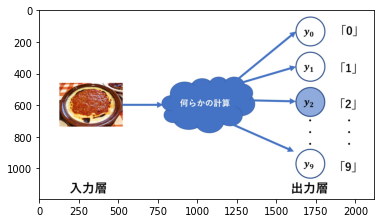

In [82]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('mirano2.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

図に示すように、この例では、出力層のニューロンは上から順に数字の0、1、...、9に対応する。

また、図では出力層のニューロンの値をちょっと濃い青色で表現している。

この例では、$y_2$が一番濃く描画されており、$y_2$のニューロンが一番高い値を出力している。

これは$y_2$に相当するクラス、つまり「2」であることを、ニューラルネットワークが予測していることを意味する。

# 6 手書き文字認識

ニューラルネットワークの仕組みを学んだところで、実践的な問題に取り組む。

ここでは、手書き数字画像の分類を行いたいと思う。

学習は既に完了したものとして、学習済のパラメータを使って、ニューラルネットワークの「推論処理」だけを実装していく。

なお、この推論処理は、ニューラルネットワークの順方向伝播(forward propagation)とも言う。

機械学習の問題を解く際の手順(「学習」と「推論」の2つのフェーズで行う)と同様、ニューラルネットワークを使って問題を解く場合も、初めに訓練データ(学習データ)を使って重みパラメータの学習を行い、推論時には、先に学習したパラメータを使って、入力データの分類を行う。

**6.1 MNISTデータセット**

ここで使用するデータセットはMNISTという手書き数字の画像セットである。

MNISTは機械学習の分野で最も有名なデータセットのひとつであり、簡単な実験から論文として発表される研究まで、様々な場所で利用されている。

実際、画像認識や機械学習の論文を読んでいると実験用のデータとしてよく登場するのが、このMNISTデータセットだったりする。

MNISTデータセットは、0から9までの数字画像から構成される。

訓練画像が60,000枚、テスト画像が10,000枚用意されており、それらの画像を使用して、学習と推論を行う。

一般的なMNISTデータセットの使い方では、訓練画像を使って学習を行い、学習したモデルでテスト画像に対してどれだけ正しく分類できるかを計測する。

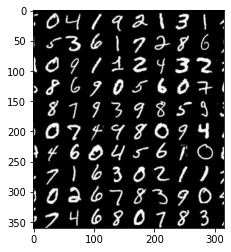

In [83]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('MNIST.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

MNISTの画像データは28×28のグレー画像(1チャンネル)で、各ピクセルは0から255までの値を取る。

それぞれの画像データに対しては、「7」「2」「1」といったように、対応するラベルが与えられている。

ここでは、MNISTデータセットのダウンロードから画像データのNumPy配列への変換までをサポートする便利なPythonスクリプトである**mnist.py**を提供する。

この**mnist.py**の利用に際しては、カレントディレクトリがch01、ch02、ch03、...、ch08ディレクトリのいずれかである必要がある。

この**mnist.py**の関数**load_mnist()**を用いれば、MNISTデータを次のように簡単に読み込むことができる。

In [93]:
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist

# 最初の呼び出しは数分待つ
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# それぞれのデータの形状を出力
print(x_train.shape) 
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


ここでは最初に、親ディレクトリのファイルをインポートするための設定を行う。

そして、**dataset\mnist.py**の**load_mnist**関数のインポートを行う。

最後に、そのインポートした**load_mnist**関数によって、MNISTデータセットの読み込みを行う。

**load_mnist**の初回呼び出し時には、MNISTデータのダウンロードを行うため、ネット接続が必要である。

2回目以降の呼び出しは、ローカルに保存したファイル(pickleファイル)の読み込みだけを行うため、すぐに処理が終了する。

**load_mnist**関数は、「(訓練画像、訓練ラベル)、(テスト画像、テストラベル)」という形式で、読み込んだMNISTデータを返す。

また、引数として、**load_mnist(normalize=True, flatten=True, one_hot_label=False)**のように、3つの引数を設定することができる。

一つ目の引数である**normalize**は、入力画像を0.0~1.0の値に正規化するかどうかを設定する。

これを**False**にすれば、入力画像のピクセルは0~255のままである。

2つ目の引数の**flatten**は、入力画像を平らにする(1次元配列にする)かどうかを設定する。

**False**に設定すると。入力画像は1×28×28の3次元配列として、**True**にすると784個の要素からなる1次元配列として格納される。

3つ目の引数の**one_hot_label**は、ラベルをone-hot表現として格納するかどうかを設定する。

one-hot表現とは、例えば**[0,0,1,0,0,0,0,0,0,0]**のように、正解となるラベルだけが1で、それ以外は0の配列である。

**one_hot_label**が**False**のときは、7、2、といったように単純に正解となるラベルが格納されるが、**one_hot_label**が**True**のときは、ラベルはone-hot表現として格納される。

Pythonには、pickleという便利機能がある。

これは、プログラムの実行中のオブジェクトをファイルとして保存する機能である。

一度保存したpickleファイルをロードすると、プログラムの実行中だったときのオブジェクトを即座に復元することができる。

なお、MNISTデータセットを読み込む**load_mnist()**関数の内部でも、(2回目以降の読み込み時に)pickleを利用している。

pickleの機能を利用することで、MNISTのデータの準備を高速に行うことができる。

それでは、データの確認も兼ねて、MNIST画像を表示させてみる。

画像の表示にはPIL(Python Image Library)モジュールを使用する。

次のコードを実行すると、訓練画像の1枚目が表示される。

In [94]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


Colabでは画像が表示されませんでした。なぜ。

ここでの注意点としては、**flatten=True**として読み込んだ画像はNumPy配列として1次元で格納されているということである。

そのため、画像の表示に際しては、元の形状である28×28のサイズに再変形(reshape)する必要がある。

NumPy配列の形状の変形は、**reshape**メソッドによって行い、希望する形状を引数で指定する。

また、NumPyとして格納された画像データを、PIL用のデータオブジェクトに変換する必要があるが、この変換は、**Image.fromarray()**によって行う。

**6.2 ニューラルネットワークの推論処理**

それでは、このMNISTデータセットに対して、推論処理を行うニューラルネットワークを実装する。

ネットワークは、入力層を784個、出力層を10個のニューロンで構成する。

入力層の784という数字は、画像サイズの28×28=784から、また、出力層の10という数字は、10クラス分類(数字の0から9の10クラス)から来ている。

また、隠れ層が2つあり、一つ目の隠れ層が50個、二つ目の層が100個のニューロンを持つものとする。

それでは初めに、3つの関数＿＿＿＿**get_data()**、**init_network()**、**predict()**＿＿＿＿を定義する。

In [95]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


**init_network()**では、pickleファイルの**sample_weight.pkl**に保存された学習済みの重みパラメータを読み込む。

このファイルには、重みとバイアスのパラメータがディクショナリ型の変数として保存されている。

残りの2つの関数は、これまで見てきた実装と同じものである。

それでは、これらを使い、ニューラルネットワークによる推論処理を行う。

そして、認識精度を評価していく。

In [96]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


ここでは最初に、MNISTデータセットを取得し、ネットワークを生成する。

続いて、xに格納された画像データを1枚ずつfor文で取り出し、**predict()**関数によって分配を行う。

**predict()**関数の結果は各ラベルの確率がNumPy配列として出力される。

例えば、**[0.1,0.3,0.2,...,0.04]**のような配列が出力され、これは「0」の確率が0.1、「1」の確率が0.3、...と解釈する。

そして、この確率リストから最も大きな値のインデックス＿＿＿＿何番目の要素が一番確率が高いか＿＿＿＿を取り出し、それを予測結果とする。

なお、配列中の最大値のインデックスを取得するには、**np.argmax(x)**を使う。

**np.argmax(x)**は、引数xに与えられた配列で最大の値を持つ要素のインデックスを取得する。

最後に、ニューラルネットワークが予測した答えと正解ラベルとを比較して、正解した割合を認識精度(accuracy)とする。

以上のコードを実行すると、「Accuracy:0.9352」と表示される。

これは、93.52%正しく分類することができた、ということを示している。

ここでは、学習済みのニューラルネットワークを動かすことが目的だったので、認識精度についての議論は行わないが、今後、ニューラルネットワークの構造や学習方法の工夫により、この認識精度がさらに高くなっていく。はず。そうしたい。

なお、この例では、**load_mnist**関数の引数である**normalize**には**True**を設定した。

**normalize**を**True**に設定すると、その関数の内部では画像の各ピクセルを値を255で除算し、データの値が0.0～1.0の範囲に収まるように変換される。

このようなデータをある決まった範囲に変換する処理を**正規化**(normalization)という。

また、ニューラルネットワークの入力データに対して、何らかの決まった変換を行うことを**前処理**(pre-processing)という。

ここでは、入力画像データに前処理として正規化を行ったことになる。

前処理はニューラルネットワーク(ディープラーニング)において、実践的によく用いられる。

前処理の有効性は、識別性能の向上や学習の高速化など、多くの実験によって示されている。

先ほどの例では、前処理として各ピクセルの値を255で割るだけの単純な正規化を行った。

実際には、データ全体の分布を考慮した前処理を行うことが多くある。

例えば、データ全体の平均や標準偏差を利用して、データ全体が0を中心に分布するように移動させたり、データの広がりをある範囲に収めたりといった正規化を行う。

それ以外にも、データ全体の形状を均一にするといった方法＿＿＿＿これを**白色化**(whitening)という＿＿＿＿などがある。

**6.3 バッチ処理**

MNISTデータセットを扱ったニューラルネットワークの実装は以上である。

が、ここでは入力データと重みパラメータの「形状」に注意して、先ほどの実装を再度見ていくことにする。

それでは、Pythonインタプリタを使って、先のニューラルネットワークの各層の重みの形状を出力していく。

In [98]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [99]:
x[0].shape

(784,)

In [100]:
W1.shape

(784, 50)

In [101]:
W2.shape

(50, 100)

In [102]:
W3.shape

(100, 10)

上記より、多次元配列の対応する次元の要素数が一致していることがわかる。
また、最終的に、要素数が10の1次元配列yが出力される。

全体を通してみれば、784の要素からなる1次元配列が入力され、1次元の配列(要素数10)が出力されるという流れになっている。

これは、画像データを1枚だけ入力したときの処理の流れである。

それでは、画像を複数枚まとめて入力する場合を考えよう。

例えば、100枚の画像をまとめて、1回の**predict()**関数で処理したいとする。

そのためには、ｘの形状を100×784として、100枚分のデータをまとめて入力データとすることができる。

下図のようなことである。

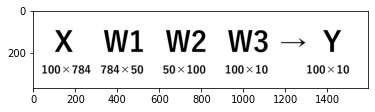

In [103]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('shape.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

図に示すように、入力データの形状は100×784、出力データの形状は100×10になる。

これは、100枚分の入力データの結果が一度に出力されることを表している。

例えば、x[0]とy[0]には0番目の画像とその推論の結果、x[1]とy[1]には1番目の画像とその結果、...というように格納されている。

なお、ここで説明したような、まとまりのある入力データを**バッチ**(batch)と呼ぶ。

バッチには、「束」という意味があり、画像がお札のように束になっているイメージである。

バッチ処理には、コンピュータで計算する上で大きな利点がある。

それは、バッチ処理によって、1枚あたりの処理時間を大幅に短縮できるという利点である。

なぜ処理時間を短縮できるかというと、数値計算を扱うライブラリの多くは、大きな配列の計算を効率良く処理できるような高度な最適化が行われているからである。

また、ニューラルネットワークの計算において、データ転送がボトルネックになる場合は、バッチ処理を行うことで、バス帯域の負荷を軽減することができる。(正確には、データの読み込みに対して演算の割合を多くすることができる)。

つまり、バッチ処理を行うことで大きな配列の計算を行うことになるが、大きな配列を一度に計算する方が、分割した小さい配列を少しずつ計算するよりも速く計算が完了するのである。

それでは、バッチ処理による実装を行う。

In [104]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


追加部分の解説を示す。

まずは**range()**関数である。

**range()**関数は、**range(start, end)**のように指定すると、**start**から**end-1**までの整数からなるリストを作成する。

また、**range(start, end, step)**のように3つの整数を指定すると、リストの要素の次の値がstepで指定された値だけ増加するリストを作成する。

ここでは、ひとつ例を見てみる。

In [105]:
list( range(0, 10) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [106]:
list( range(0, 10, 3) )

[0, 3, 6, 9]

この**range()**関数によって出力されるリストをもとに、**x[i:i+batch_size]**のように、入力データからバッチを抜き出す。

**x[i:i+batch_size}**は、入力データのi番目から、i+batch_n番目までのデータを取り出すが、この例では、x[0:100]、x[100:200]、...といったように、先頭から100枚ずつバッチとして取り出すことになる。

そして、**argmax()**で最大値のインデックスを取得する。

ただし、ここでは、**axis=1**という引数を与えていることに注意。

これは、100×10の配列の中で、1次元目の要素ごとに(1次元目を軸として)、最大値のインデックスを見つけることを指定している。(0次元目は最初の次元に対応)

ここでもひとつ、例を示す。

In [107]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


最後に、バッチ単位で分類した結果と、実際の答えを比較する。

そのために、NumPy配列どうしで比較演算子(==)によって「、**True/False**からなるブーリアン配列を作成し、**True**の個数を算出する。

これらの処理手順は、次の例で確認する。

In [108]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

[ True  True False  True]


In [109]:
np.sum(y==t)

3

以上で、バッチ処理による実装の解説は終わりである。

バッチ処理を行うことで、高速に効率よく処理することができた。

また、次のnbでニューラルネットワークの学習を行う際にも、画像データをまとまりのあるバッチとして学習する。

その際にも、ここで実装したバッチ処理と同様な実装を行うことになる。

# 7 まとめ

本ノートブックでは、ニューラルネットワークの順方向の伝播(forward propagation)について解説した。

本ノートブックで説明したニューラルネットワークは、パーセプトロンと、ニューロンの信号が階層的に伝わるという点で同じであった。

しかし、次のニューロンへ信号を送信する際に、信号を変化させる活性化関数に大きな違いがあった。

ニューラルネットワークでは活性化関数が滑らかに変化するシグモイド関数、パーセプトロンでは信号が急に変化するステップ関数を使用した。

この違いが、ニューラルネットワークの学習において重要になってくるが、これは次のノートブックで説明しようと思う。